In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras

In [129]:
# Importing the dataset
df = pd.read_csv('train.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [130]:
#tokenizing the data
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['comment_text'])
sequences = tokenizer.texts_to_sequences(df['comment_text'])

In [131]:
#padding the data
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
maxlen = 100
data = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen)

In [132]:
#splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, df.iloc[:,2:], test_size=0.2, random_state=0)

In [133]:
#building the model
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D

#model = Sequential()
#model.add(Embedding(10000, 8, input_length=maxlen))
#model.add(Flatten())
#model.add(Dense(6, activation='sigmoid'))
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
#model.summary()

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 8)            80000     
                                                                 
 conv1d_6 (Conv1D)           (None, 96, 128)           5248      
                                                                 
 global_max_pooling1d_6 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
 dense_16 (Dense)            (None, 6)                 66        
                                                                 
Total params: 86,604
Trainable params: 86,604
Non-trainable params: 0
_________________________________________________

In [134]:
#training the model
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/5
3192/3192 [==============================] - 17s 5ms/step - loss: 0.0772 - accuracy: 0.9282 - val_loss: 0.0541 - val_accuracy: 0.9945
Epoch 2/5
3192/3192 [==============================] - 16s 5ms/step - loss: 0.0488 - accuracy: 0.9943 - val_loss: 0.0527 - val_accuracy: 0.9945
Epoch 3/5
3192/3192 [==============================] - 16s 5ms/step - loss: 0.0450 - accuracy: 0.9922 - val_loss: 0.0539 - val_accuracy: 0.9945
Epoch 4/5
3192/3192 [==============================] - 18s 6ms/step - loss: 0.0418 - accuracy: 0.9831 - val_loss: 0.0555 - val_accuracy: 0.9904
Epoch 5/5
3192/3192 [==============================] - 19s 6ms/step - loss: 0.0386 - accuracy: 0.9613 - val_loss: 0.0592 - val_accuracy: 0.9855


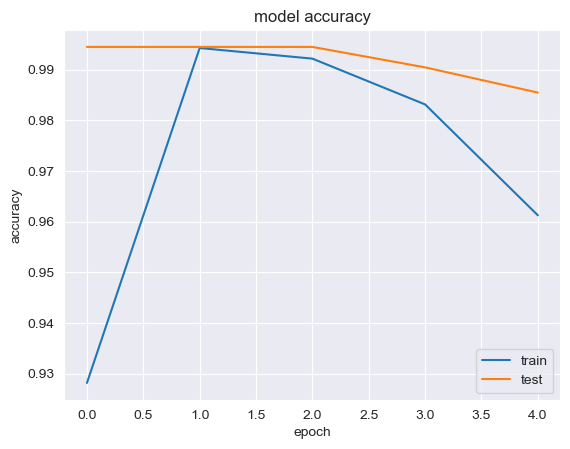

In [135]:
#plotting the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

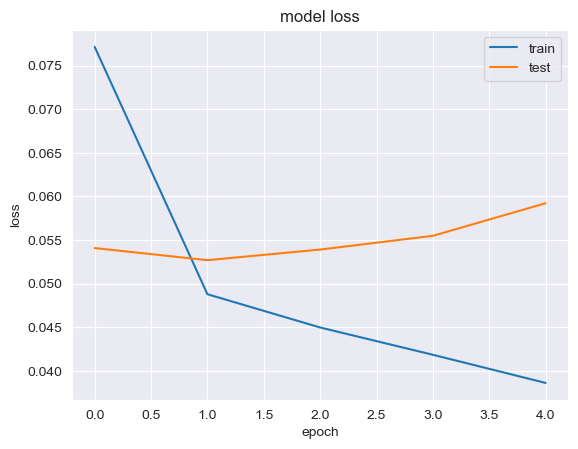

In [136]:
#plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [137]:
#evaluating the model
model.evaluate(X_test, y_test)

998/998 [==============================] - 2s 2ms/step - loss: 0.0579 - accuracy: 0.9859


[0.05794142559170723, 0.9859000444412231]

In [138]:
#predicting the model
model.predict(X_test)

998/998 [==============================] - 2s 2ms/step


array([[4.2405064e-04, 8.5132427e-07, 1.4583880e-04, 9.9731978e-06,
        3.8225284e-05, 7.4665863e-06],
       [5.7243840e-03, 2.8258941e-05, 3.6487128e-03, 1.0420429e-04,
        3.7993331e-04, 1.6314548e-04],
       [7.1658188e-01, 1.2053691e-03, 8.5145928e-02, 3.0660348e-03,
        1.7672741e-01, 1.5583208e-02],
       ...,
       [4.0178322e-05, 5.2441830e-08, 2.0045367e-05, 9.9794488e-07,
        2.4353842e-06, 6.3096712e-07],
       [6.4186840e-03, 5.2535165e-06, 7.0289423e-04, 6.3755229e-05,
        5.6625280e-04, 7.8120276e-05],
       [1.8053829e-03, 4.0968712e-06, 5.6347449e-04, 3.0622046e-05,
        1.5625166e-04, 4.1150193e-05]], dtype=float32)

In [139]:
#tokenizing the test data
test = pd.read_csv('test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [140]:
test_sequences = tokenizer.texts_to_sequences(test['comment_text'])
test_data = tf.keras.utils.pad_sequences(test_sequences, maxlen=maxlen)

In [141]:
#predicting the test data
test_pred = model.predict(test_data)

4787/4787 [==============================] - 8s 2ms/step
